In [1]:
%matplotlib inline
from utils import *

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [2]:
wk_dir = os.getcwd()
%cd ../data/kg/cd-redux/sample
data_dir = os.getcwd()

/home/ubuntu/courses/deeplearning1/data/kg/cd-redux/sample


In [3]:
trn_dir = data_dir + "/train/"
val_dir = data_dir + "/valid/"
test_dir = data_dir + "/test/"
model_dir = data_dir + "/models/"

In [4]:
bsz = 8

In [5]:
trn_data = get_data(trn_dir)
val_data = get_data(val_dir)
trn_batches = get_batches(trn_dir, batch_size=bsz)
val_batches = get_batches(val_dir, batch_size=bsz)

Found 200 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [9]:
val_classes = val_batches.classes

In [10]:
def fit_model(model, trn_batches, val_batches, nb_epoch=1):
    model.fit_generator(
        trn_batches,
        samples_per_epoch=trn_batches.N,
        
        nb_epoch=nb_epoch,
        
        validation_data=val_batches,
        nb_val_samples=val_batches.N
    )

def fit_epochs(model, trn_batches, val_batches, nb_epoch, run):
    for i in range(nb_epoch):
        fit_model(model, trn_batches, val_batches, nb_epoch=1)
        model.save_weights(model_dir + "finetune{}{}.h5".format(run, str(i)))

### RMSProp, 0.1

In [11]:
vgg = Vgg16()
model = vgg.model

model.pop()
for layer in model.layers:
    layer.trainable = False
    
model.add(
    Dense(trn_batches.nb_class, activation="softmax")
)
model.compile(
    optimizer=RMSprop(lr=0.1),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

fit_epochs(model, trn_batches, val_batches, nb_epoch=1, run="lastlayer")

Epoch 1/1
200/200 [==============================] - 6s - loss: 9.1889 - acc: 0.4150 - val_loss: 7.7367 - val_acc: 0.5200


Found 50 images belonging to 2 classes.
50/50 [==============================] - 1s     
[[26  0]
 [24  0]]


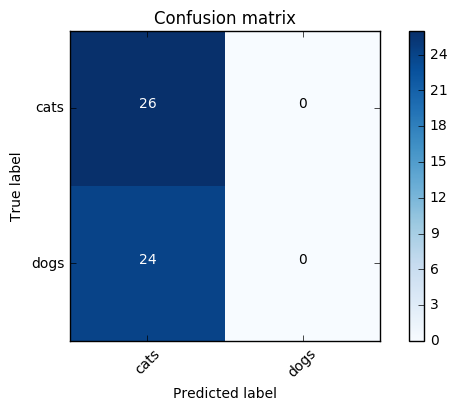

In [12]:
val_batches = get_batches(val_dir, shuffle=False, batch_size=1)
preds = model.predict_classes(val_data, batch_size=bsz)
cm = confusion_matrix(val_classes, preds)
plot_confusion_matrix(cm, val_batches.class_indices)

In [13]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 3, 224, 224)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
zeropadding2d_14 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 64, 224, 224)  0           zeropadding2d_14[0][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_14[0][0]           
___________________________________________________________________________________________

### RMSProp, 0.01

In [14]:
vgg = Vgg16()
model = vgg.model

model.pop()
for layer in model.layers:
    layer.trainable = False
    
model.add(
    Dense(trn_batches.nb_class, activation="softmax")
)
model.compile(
    optimizer=RMSprop(lr=0.01),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

fit_epochs(model, trn_batches, val_batches, nb_epoch=1, run="lastlayer")

Epoch 1/1
200/200 [==============================] - 6s - loss: 1.6713 - acc: 0.8550 - val_loss: 0.8921 - val_acc: 0.9400


Found 50 images belonging to 2 classes.
50/50 [==============================] - 1s     
[[23  3]
 [ 0 24]]


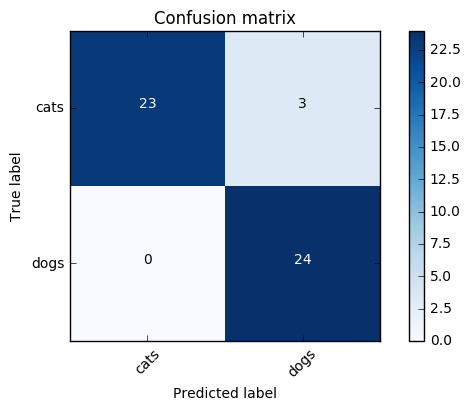

In [15]:
val_batches = get_batches(val_dir, shuffle=False, batch_size=1)
preds = model.predict_classes(val_data, batch_size=bsz)
cm = confusion_matrix(val_classes, preds)
plot_confusion_matrix(cm, val_batches.class_indices)

In [16]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_3 (Lambda)                (None, 3, 224, 224)   0           lambda_input_3[0][0]             
____________________________________________________________________________________________________
zeropadding2d_27 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_3[0][0]                   
____________________________________________________________________________________________________
convolution2d_27 (Convolution2D) (None, 64, 224, 224)  0           zeropadding2d_27[0][0]           
____________________________________________________________________________________________________
zeropadding2d_28 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_27[0][0]           
___________________________________________________________________________________________

### RMSProp, 0.001

In [17]:
vgg = Vgg16()
model = vgg.model

model.pop()
for layer in model.layers:
    layer.trainable = False
    
model.add(
    Dense(trn_batches.nb_class, activation="softmax")
)
model.compile(
    optimizer=RMSprop(lr=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

fit_epochs(model, trn_batches, val_batches, nb_epoch=1, run="lastlayer")

Epoch 1/1
200/200 [==============================] - 6s - loss: 0.5340 - acc: 0.8600 - val_loss: 0.0953 - val_acc: 0.9800


Found 50 images belonging to 2 classes.
50/50 [==============================] - 1s     
[[25  1]
 [ 0 24]]


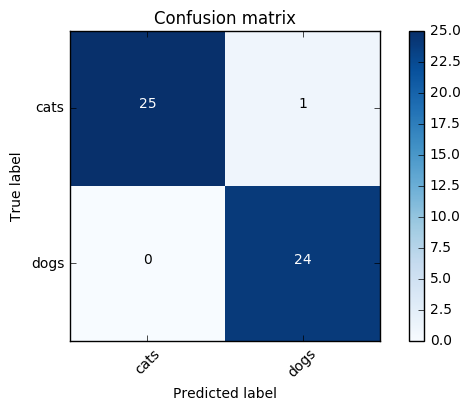

In [18]:
val_batches = get_batches(val_dir, shuffle=False, batch_size=1)
preds = model.predict_classes(val_data, batch_size=bsz)
cm = confusion_matrix(val_classes, preds)
plot_confusion_matrix(cm, val_batches.class_indices)

In [19]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_4 (Lambda)                (None, 3, 224, 224)   0           lambda_input_4[0][0]             
____________________________________________________________________________________________________
zeropadding2d_40 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_4[0][0]                   
____________________________________________________________________________________________________
convolution2d_40 (Convolution2D) (None, 64, 224, 224)  0           zeropadding2d_40[0][0]           
____________________________________________________________________________________________________
zeropadding2d_41 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_40[0][0]           
___________________________________________________________________________________________

### Adam, 0.1

In [20]:
vgg = Vgg16()
model = vgg.model

model.pop()
for layer in model.layers:
    layer.trainable = False
    
model.add(
    Dense(trn_batches.nb_class, activation="softmax")
)
model.compile(
    optimizer=Adam(lr=0.1),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

fit_epochs(model, trn_batches, val_batches, nb_epoch=1, run="lastlayer")

Epoch 1/1
200/200 [==============================] - 6s - loss: 4.3847 - acc: 0.7100 - val_loss: 0.9671 - val_acc: 0.9400


Found 50 images belonging to 2 classes.
50/50 [==============================] - 1s     
[[23  3]
 [ 0 24]]


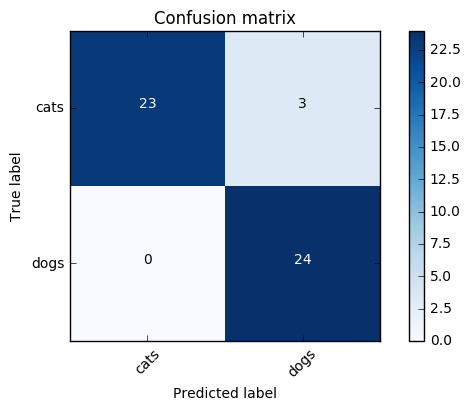

In [21]:
val_batches = get_batches(val_dir, shuffle=False, batch_size=1)
preds = model.predict_classes(val_data, batch_size=bsz)
cm = confusion_matrix(val_classes, preds)
plot_confusion_matrix(cm, val_batches.class_indices)

In [22]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_5 (Lambda)                (None, 3, 224, 224)   0           lambda_input_5[0][0]             
____________________________________________________________________________________________________
zeropadding2d_53 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_5[0][0]                   
____________________________________________________________________________________________________
convolution2d_53 (Convolution2D) (None, 64, 224, 224)  0           zeropadding2d_53[0][0]           
____________________________________________________________________________________________________
zeropadding2d_54 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_53[0][0]           
___________________________________________________________________________________________

### Adam, 0.01

In [23]:
vgg = Vgg16()
model = vgg.model

model.pop()
for layer in model.layers:
    layer.trainable = False
    
model.add(
    Dense(trn_batches.nb_class, activation="softmax")
)
model.compile(
    optimizer=Adam(lr=0.01),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

fit_epochs(model, trn_batches, val_batches, nb_epoch=1, run="lastlayer")

Epoch 1/1
200/200 [==============================] - 6s - loss: 1.4358 - acc: 0.8550 - val_loss: 0.9078 - val_acc: 0.9200


Found 50 images belonging to 2 classes.
50/50 [==============================] - 1s     
[[22  4]
 [ 0 24]]


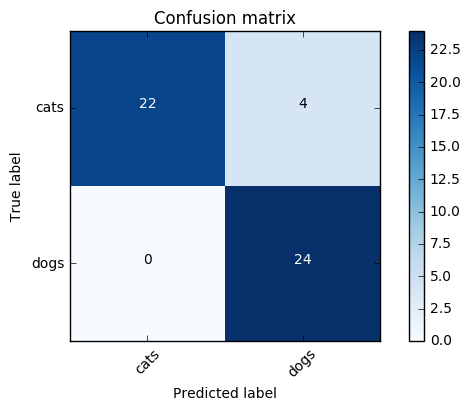

In [24]:
val_batches = get_batches(val_dir, shuffle=False, batch_size=1)
preds = model.predict_classes(val_data, batch_size=bsz)
cm = confusion_matrix(val_classes, preds)
plot_confusion_matrix(cm, val_batches.class_indices)

In [25]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_6 (Lambda)                (None, 3, 224, 224)   0           lambda_input_6[0][0]             
____________________________________________________________________________________________________
zeropadding2d_66 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_6[0][0]                   
____________________________________________________________________________________________________
convolution2d_66 (Convolution2D) (None, 64, 224, 224)  0           zeropadding2d_66[0][0]           
____________________________________________________________________________________________________
zeropadding2d_67 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_66[0][0]           
___________________________________________________________________________________________

### Adam, 0.001

In [26]:
vgg = Vgg16()
model = vgg.model

model.pop()
for layer in model.layers:
    layer.trainable = False
    
model.add(
    Dense(trn_batches.nb_class, activation="softmax")
)
model.compile(
    optimizer=Adam(lr=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

fit_epochs(model, trn_batches, val_batches, nb_epoch=1, run="lastlayer")

Epoch 1/1
200/200 [==============================] - 6s - loss: 0.5954 - acc: 0.8200 - val_loss: 0.1839 - val_acc: 0.9400


Found 50 images belonging to 2 classes.
50/50 [==============================] - 1s     
[[24  2]
 [ 1 23]]


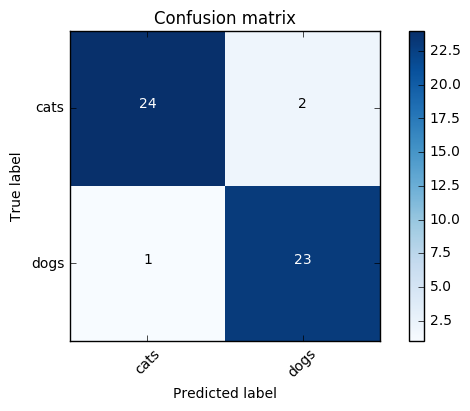

In [27]:
val_batches = get_batches(val_dir, shuffle=False, batch_size=1)
preds = model.predict_classes(val_data, batch_size=bsz)
cm = confusion_matrix(val_classes, preds)
plot_confusion_matrix(cm, val_batches.class_indices)

In [28]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_7 (Lambda)                (None, 3, 224, 224)   0           lambda_input_7[0][0]             
____________________________________________________________________________________________________
zeropadding2d_79 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_7[0][0]                   
____________________________________________________________________________________________________
convolution2d_79 (Convolution2D) (None, 64, 224, 224)  0           zeropadding2d_79[0][0]           
____________________________________________________________________________________________________
zeropadding2d_80 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_79[0][0]           
___________________________________________________________________________________________